In [1]:
%matplotlib inline
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("white")
from pandas.tools.plotting import scatter_matrix

In [4]:
import h5py
import numpy as np
import sys
import time

sys.path.append("../")

import extract_catalog as ec
# following line only works when you are in the ks_KDE.r directory
import get_gal_centroids as cent
import compute_clst_prop as cp
import pickle
import sys
import pandas as pd

h5File = "../../data/Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5"
f = h5py.File(h5File, "r")


allClst = 1
compute_relaxedness0 = False

wwts_key = ["SubhaloMass", "SubhaloMassType4"]  # , "i_band"]
wwt_suffix = ["FoF_mass", "stel_mass"]  # , "i_band"]


file_suffix = '_{0}'.format(allClst) + '.h5'

print "examining {0} clusters in total".format(allClst)

df_list = [ec.extract_clst(f, clstNo) for clstNo in range(allClst)]

cut_kwargs = {'DM_cut': 1e3, 'star_cut': 5e1}


examining 1 clusters in total


In [5]:
mask = cent.cut_reliable_galaxies(df_list[0], **cut_kwargs)

In [6]:
df = df_list[0]

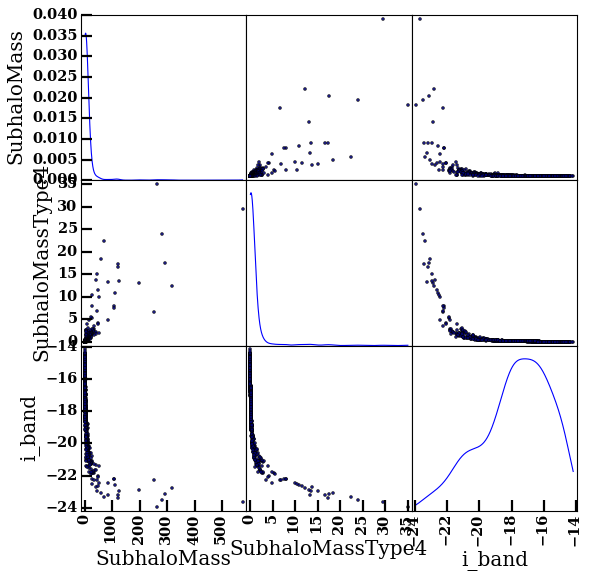

In [7]:
axArray = scatter_matrix(df[["SubhaloMass", "SubhaloMassType4", "i_band"]][mask][2:],
                         diagonal="kde", figsize=(8, 8), alpha=0.8)
for axTemp in axArray: 
    for ax in axTemp: 
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]): 
            item.set_fontsize(18)
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(13)

In [8]:
bands = [b for b in df.keys() if "_band" in b]

In [9]:
bands

['U_band',
 'B_band',
 'V_band',
 'K_band',
 'g_band',
 'r_band',
 'i_band',
 'z_band']

In [10]:
plt.loglog

<function matplotlib.pyplot.loglog>

In [11]:
bands

['U_band',
 'B_band',
 'V_band',
 'K_band',
 'g_band',
 'r_band',
 'i_band',
 'z_band']

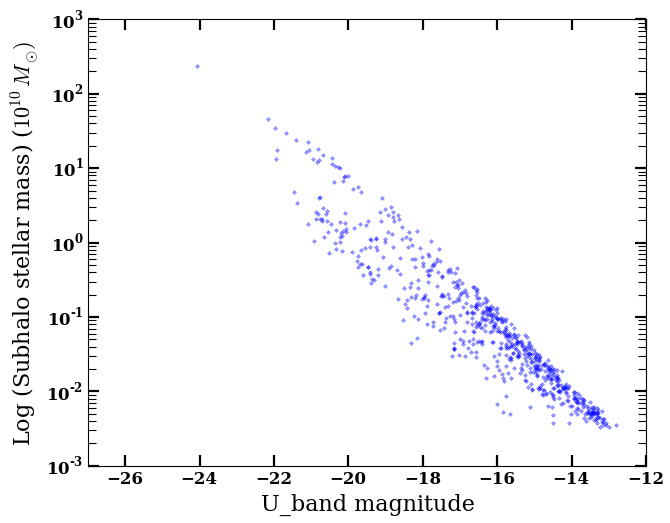

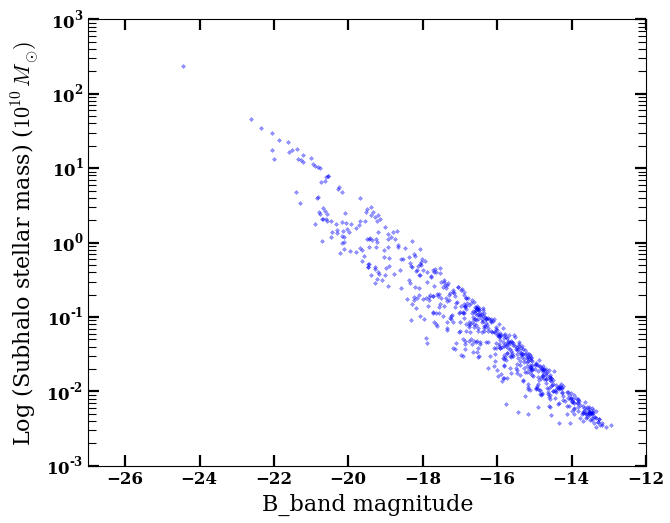

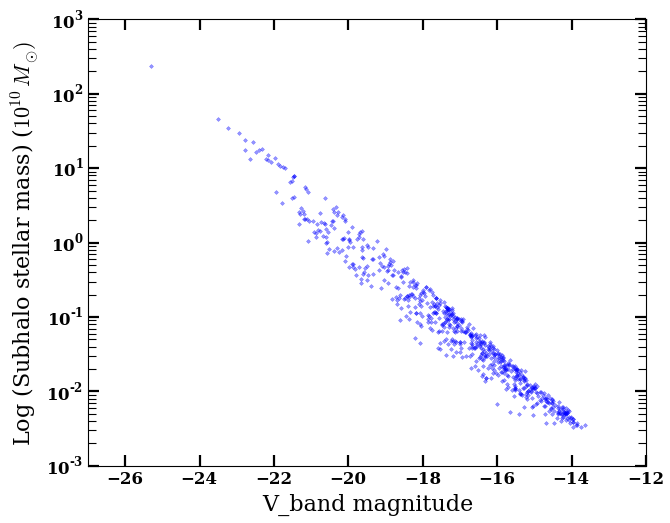

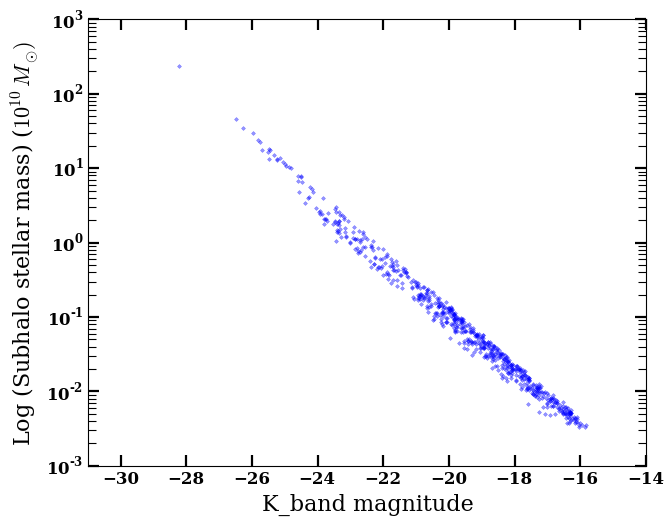

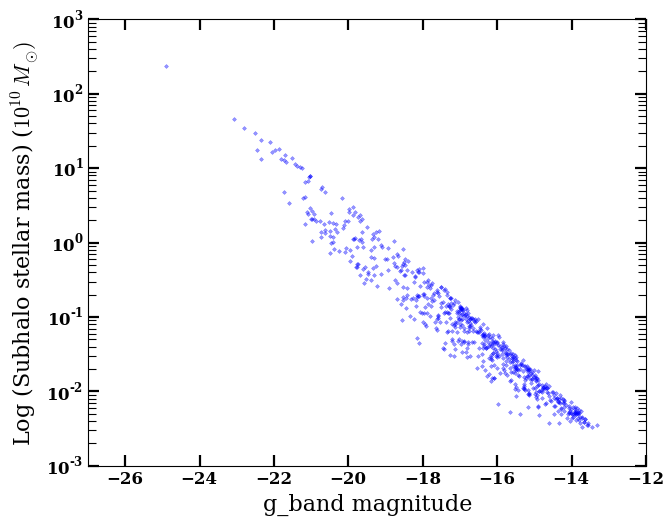

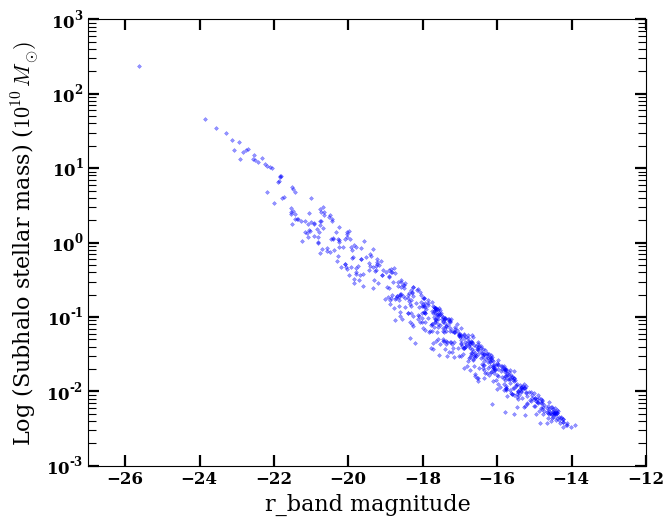

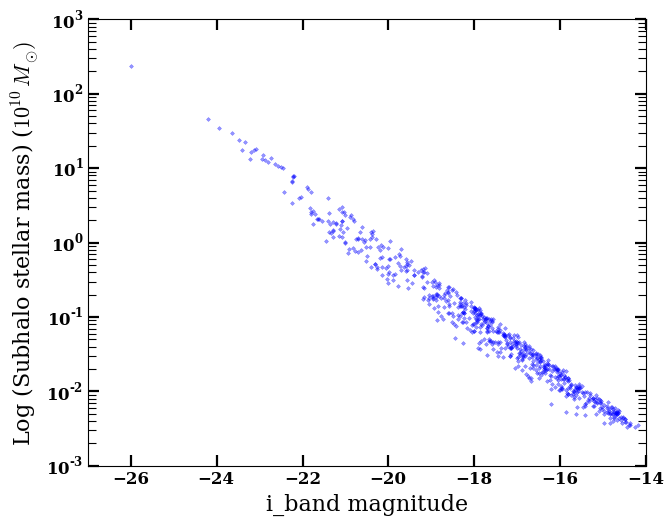

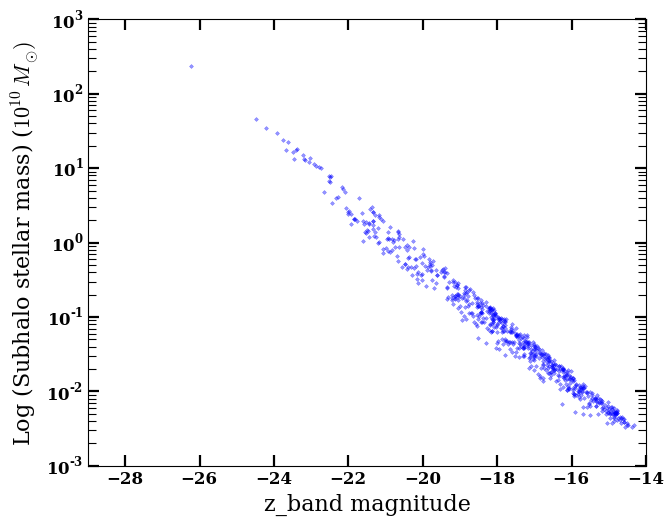

In [14]:
for b in bands: 
    plt.semilogy(df[b][mask],
                 df["SubhaloMassType4"][mask],
                 marker='.', ls='None',
                 alpha=.4, label=b)
    plt.xlim((plt.xlim()[0]-1, plt.xlim()[1]))
    plt.ylabel("Log (Subhalo stellar mass) ($10^{10} M_\odot)$")
    plt.xlabel(b + " magnitude")
    plt.show()
    plt.close()
# plt.legend(loc='best', frameon=False)

## plots ....

# total-subhalo-mass vs I-band luminosity relationship 

\begin{equation}
    M_{tot-subhalo} = -a I\exp(- I - b)
\end{equation}

In [115]:
df["I_band_lum"] = df["i_band"].apply(lum_to_total_mass)

0     3824.591968
1      601.889399
2      335.518381
3      453.795008
4      283.556033
5      194.348543
6      137.527103
7       77.290155
8      150.947656
9      262.810331
10     210.415717
11     241.308756
12     159.061008
13     109.299376
14     185.777967
...
16922   -0
16923   -0
16924   -0
16925   -0
16926   -0
16927   -0
16928   -0
16929   -0
16930   -0
16931   -0
16932   -0
16933   -0
16934   -0
16935   -0
16936   -0
Name: i_band, Length: 16937, dtype: float64

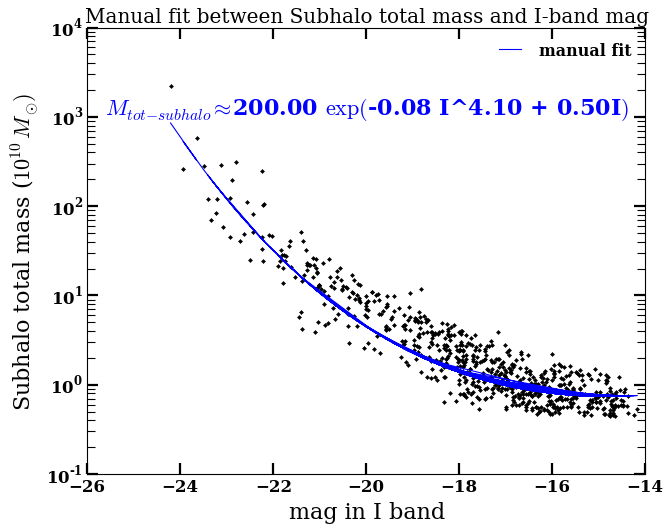

In [252]:
a = 2e2
b = -7.8e-2
c = 4.1 
d = 5e-1
plt.semilogy(df["i_band"][mask][1:],
        df["SubhaloMass"][mask][1:],
        marker='.', ls='none', color='k')
plt.semilogy(df["i_band"][mask][1:],
             a * np.exp((b * df["i_band"][mask][1:]) ** c + d * df["i_band"][mask][1:]), 
             'b', label="manual fit") 
# plt.xlim((plt.xlim()[0]-1, plt.xlim()[1]))
plt.ylabel("Subhalo total mass ($10^{10} M_\odot)$")
plt.xlabel("mag in I band")
plt.figtext(0.15, 0.75, r"$M_{tot-subhalo} \approx $" + 
            r"{0:.2f} $\exp(${1:.2f} I^{2:.2f} + {3:.2f}I$)$".format(a, b, c, d), 
            fontsize=20, color='b')
plt.title("Manual fit between Subhalo total mass and I-band mag", fontsize=18)
plt.legend(loc='best', frameon=False)

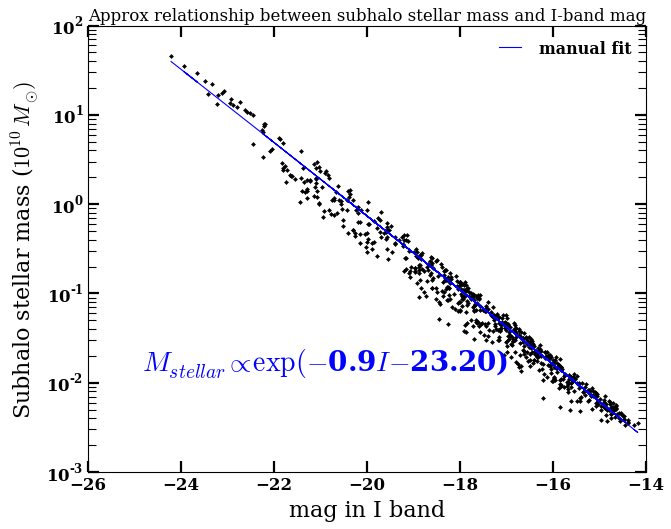

In [263]:
a = 0.9
b = 21.3
plt.semilogy(df["i_band"][mask][1:],
        df["SubhaloMassType4"][mask][1:],
        marker='.', ls='none', color='k')
plt.semilogy(df["i_band"][mask][1:],
         (-df["i_band"][mask][1:]) * 
         np.exp(-a * df["i_band"][mask][1:] - b), 'b', label="manual fit") 
# plt.xlim((plt.xlim()[0]-1, plt.xlim()[1]))
plt.ylabel("Subhalo stellar mass ($10^{10} M_\odot)$")
plt.xlabel("mag in I band")
plt.figtext(0.2, 0.3, r"$M_{stellar} \propto \exp(- $" + "{0:.1}".format(a) + 
            "$I -$" + "{0:.2f})".format(norm), 
            fontsize=25, color='b')
plt.title("Approx relationship between subhalo stellar mass and I-band mag", 
          fontsize=15)
plt.legend(loc='best', frameon=False)

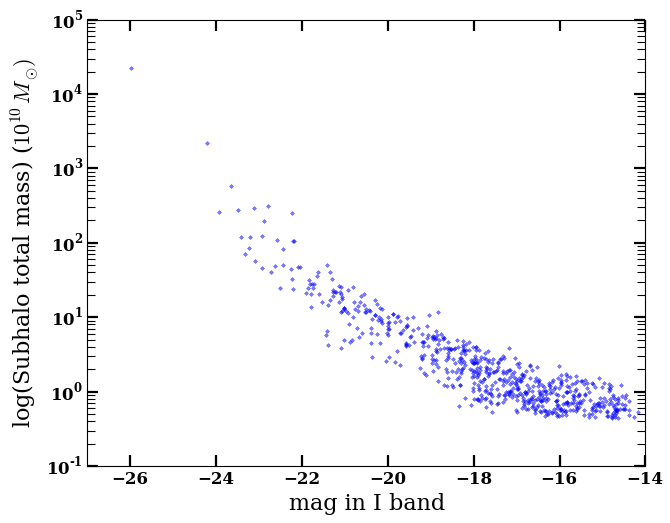

In [29]:
plt.semilogy(df["i_band"][mask],
             df["SubhaloMass"][mask],
             marker='.', ls='None',
            alpha=.5)
plt.xlim((plt.xlim()[0]-1, plt.xlim()[1]))
plt.ylabel("log(Subhalo total mass) ($10^{10} M_\odot)$")
plt.xlabel("mag in I band")

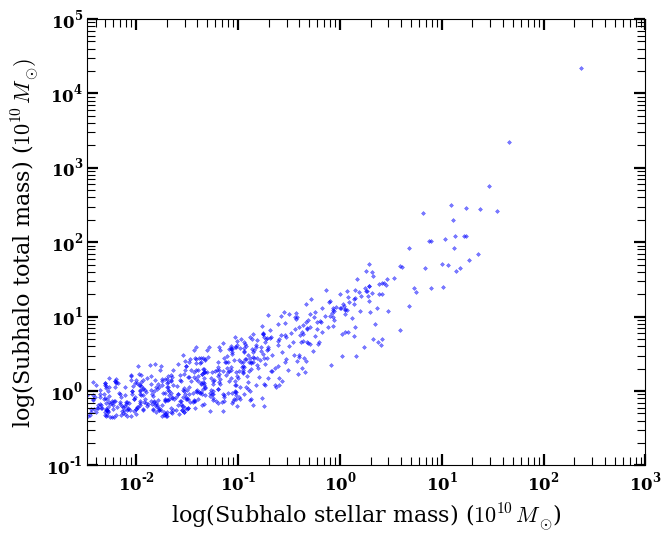

In [25]:
plt.loglog(df["SubhaloMassType4"][mask],
             df["SubhaloMass"][mask],
             marker='.', ls='None',
            alpha=.5)
plt.xlim((plt.xlim()[0]-1, plt.xlim()[1]))
plt.ylabel("log(Subhalo total mass) ($10^{10} M_\odot)$")
plt.xlabel("log(Subhalo stellar mass) ($10^{10} M_\odot$)")

```
results = {}
for i in range(len(wwts_key)):
    file_suffix = "_" + wwt_suffix[i] + '.pkl'
    result_list = \
        [cent.compute_KDE_peak_offsets(df_list[i], f, i,
                                       cent.cut_reliable_galaxies,
                                       cut_kwargs,
                                       w=df_list[i][wwts_key[i]])
         for i in range(allClst)]

    # reformat the outputs and save to a dataframe
    offsets_list = np.array([result_list[i][:2] for i in range(allClst)])

    df = pd.DataFrame(offsets_list, columns=["offset_" + wwt_suffix[i],
                                             "offset_R200_" + wwt_suffix[i]])
    fhat_list = [result_list[i][2] for i in range(allClst)]

    # don't know what to do with the fhats for now
    print "saving fhat with file suffix {0}".format(file_suffix)
    f = open('../../data/fhat' + file_suffix, 'w')
    pickle.dump(fhat_list, f)
    f.close()

if compute_relaxedness0:
    df["relaxedness1"] = [cp.compute_relaxedness0(df_list[i], f, i) for i in
                          range(allClst)]

store = pd.io.pytables.HDFStore(
    "../../data/offset_stat" + file_suffix, mode="a")
store.append(df, "df")
store.close()
```
